In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import gzip

In [2]:
root = r"C:\Users\siyap\OneDrive\Documents\ds004872"  
print(os.listdir(root))

anxiety_subjects = []

for subject in os.listdir(root):
    if not subject.startswith("sub-"):
        continue
    beh_path = os.path.join(root, subject, "beh")
    if not os.path.isdir(beh_path):
        continue
    has_anxiety_file = any("recording-Anxiety" in fname for fname in os.listdir(beh_path))
    if has_anxiety_file:
        anxiety_subjects.append(subject)

print("\nSubjects with anxiety data:", len(anxiety_subjects))
print(anxiety_subjects)

['.datalad', '.git', '.gitattributes', 'CHANGES', 'dataset_description.json', 'derivatives', 'participants.json', 'participants.tsv', 'sub-area', 'sub-army', 'sub-bath', 'sub-beer', 'sub-bird', 'sub-bite', 'sub-cell', 'sub-chat', 'sub-city', 'sub-debt', 'sub-desk', 'sub-dirt', 'sub-disk', 'sub-fact', 'sub-food', 'sub-gate', 'sub-gene', 'sub-girl', 'sub-goal', 'sub-hall', 'sub-idea', 'sub-king', 'sub-lake', 'sub-loan', 'sub-mall', 'sub-meat', 'sub-mode', 'sub-news', 'sub-nice', 'sub-oven', 'sub-path', 'sub-poem', 'sub-poet', 'sub-road', 'sub-role', 'sub-song', 'sub-soup', 'sub-town', 'sub-unit', 'sub-user', 'sub-week', 'sub-year', 'sub-zeal', 'sub-zone']

Subjects with anxiety data: 5
['sub-area', 'sub-goal', 'sub-king', 'sub-lake', 'sub-zone']


In [3]:
BigBuck_Bunny_folder = "BigBuckBunnyAnxietyData"  

dfs = []

for subject_BigBuckBunny in os.listdir(BigBuck_Bunny_folder):
    if subject_BigBuckBunny.endswith(".tsv.gz"):
        subject_file = os.path.join(BigBuck_Bunny_folder, subject_BigBuckBunny)
        
        df = pd.read_csv(subject_file, sep="\t", compression="gzip",  header=None)
        dfs.append(df)

BigBuckBunny_df = pd.concat(dfs, axis=1)

BigBuckBunny_df.columns = [f"sub_{i}" for i in range(len(dfs))]

BigBuckBunny_df

,sub_0,sub_1,sub_2,sub_3
0,50.0000,0.0,0.000,50.0000
1,50.0000,0.0,0.000,50.0000
2,50.0000,0.0,0.000,50.0000
3,50.0000,0.0,0.000,50.0000
4,50.0000,0.0,0.000,50.0000
...,...,...,...,...
485,33.8461,0.0,13.249,49.6172
486,32.9857,0.0,13.249,49.6172
487,33.3768,0.0,13.249,49.6172
488,37.8357,0.0,13.249,49.6172


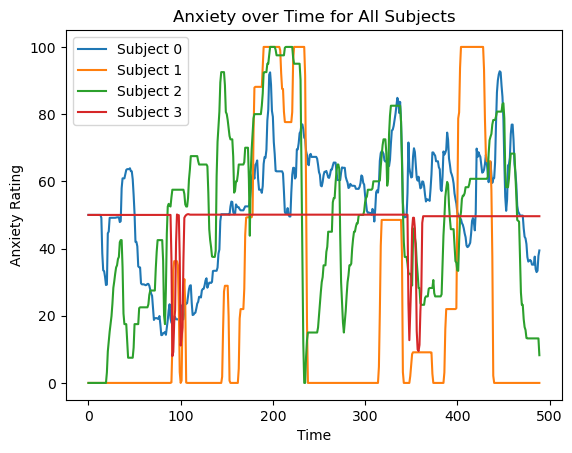

In [4]:
for sub in range(BigBuckBunny_df.shape[1]):
    sub_anxiety = BigBuckBunny_df.iloc[:, sub] 
    plt.plot(sub_anxiety, label=f"Subject {sub}")
plt.title("Anxiety over Time for All Subjects")
plt.xlabel("Time")
plt.ylabel("Anxiety Rating")
plt.legend()
plt.show()

In [5]:
group_list = []
for i in range(len(BigBuckBunny_df.columns)):
    group_list.append(BigBuckBunny_df.iloc[:, i])

stat, p = sp.stats.f_oneway(*group_list)

print(f"ANOVA F={stat}, p={p}")

ANOVA F=148.72475496647826, p=8.142075079987113e-87


In [6]:
Z_scored_BigBuckBunny_df = BigBuckBunny_df.apply(sp.stats.zscore)

In [7]:
group_list = []
for i in range(len(Z_scored_BigBuckBunny_df.columns)):
    group_list.append(Z_scored_BigBuckBunny_df.iloc[:, i])

stat, p = sp.stats.f_oneway(*group_list)
print(f"ANOVA F={stat}, p={p}")

ANOVA F=4.4696576332397084e-29, p=1.0


In [8]:
mean_anxiety_BigBuckBunny = Z_scored_BigBuckBunny_df.mean(axis=1)

master_df_output_folder = "Master_Data_Files"
master_df_init.to_csv(f"{master_df_output_folder}/mean_anxiety_annotations.csv", index=False)

NameError: name 'master_df_init' is not defined

In [ ]:
plt.plot(mean_anxiety_BigBuckBunny)
plt.title("Mean Anxiety Rating over Time")
plt.xlabel("Time")
plt.ylabel("Mean Anxiety Rating")
plt.show()

In [ ]:
corr_BigBuckBunny = Z_scored_BigBuckBunny_df.corr()

sns.heatmap(corr_BigBuckBunny, annot = True, cmap = "Blues")
plt.title("Correlation Between Anxiety Item Annotators")
plt.show()